In [1]:
import pandas as pd

from sklearn.linear_model import LinearRegression

In [2]:
dataset=pd.read_csv('SalaryData.csv')

In [3]:
dataset.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [4]:
y = dataset['Salary']
X = dataset['YearsExperience']

In [5]:
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [6]:
type(X)

pandas.core.series.Series

In [7]:
#converting into numpy array
X=X.values

In [8]:
X

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [9]:
X=X.reshape(-1,1)#reshaping the X

In [10]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [11]:
print("X = ",X.shape)
print("Type of X: ",type(X))
print("y = ",y.shape)
print("Type of y: ",type(y))

X =  (30, 1)
Type of X:  <class 'numpy.ndarray'>
y =  (30,)
Type of y:  <class 'pandas.core.series.Series'>


In [12]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [15]:
model.predict([[7.9]])

array([100446.90253816])

In [14]:
model.predict([[0]])

array([25792.20019867])

In [16]:
coef = model.coef_
print(coef)

[9449.96232146]


In [17]:
yhat = model.predict(X)

In [18]:
yhat

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

In [19]:
b = model.intercept_
print(b)

25792.20019866871


In [21]:
b + coef*1.1

array([36187.15875227])

In [22]:
import joblib

In [25]:
joblib.dump(model , 'salary.pk1')

['salary.pk1']

In [26]:
from sklearn import metrics

In [27]:
#for errors removal we take mean
metrics.mean_absolute_error(y,yhat) 

4644.2012894435375

In [28]:
#test and train data
from sklearn.model_selection import train_test_split 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=40)

In [30]:
model1 = LinearRegression()

In [31]:
model1.fit(X_train,y_train)

LinearRegression()

In [32]:
X_test

array([[ 1.5],
       [ 5.1],
       [ 6. ],
       [ 4.5],
       [ 4.9],
       [ 4.1],
       [ 6.8],
       [ 2. ],
       [10.5],
       [ 7.1],
       [ 4. ]])

In [33]:
y_test

2      37731.0
16     66029.0
19     93940.0
14     61111.0
15     67938.0
13     57081.0
20     91738.0
3      43525.0
29    121872.0
21     98273.0
11     55794.0
Name: Salary, dtype: float64

In [34]:
y_pred=model.predict(X_test)

In [35]:
y_pred

array([ 39967.14368085,  73987.00803809,  82491.9741274 ,  68317.03064522,
        72097.0155738 ,  64537.04571663,  90051.94398456,  44692.12484158,
       125016.80457395,  92886.932681  ,  63592.04948449])

In [36]:
df=pd.DataFrame({'Actual' :y_test, 'predicted':y_pred})

In [37]:
df

,Actual,predicted
2,37731.0,39967.143681
16,66029.0,73987.008038
19,93940.0,82491.974127
14,61111.0,68317.030645
15,67938.0,72097.015574
13,57081.0,64537.045717
20,91738.0,90051.943985
3,43525.0,44692.124842
29,121872.0,125016.804574
21,98273.0,92886.932681


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

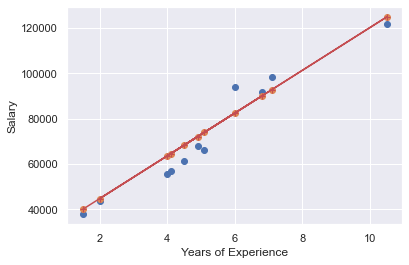

In [39]:
plt.scatter(X_test,y_test)                                #in blue
plt.scatter(X_test,y_pred)                                #in orange 
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.plot(X_test,y_pred,color = 'r',marker= '+',ls='-')    #best fit line